# SOM Exercise
### Richard Stöckl, 11908080 and Victor Olusesi, 11776826 and Richard Binder, 01425185

We implemented Task (f) of the coding assignment: SOM comparison. We chose Aggregation as coloring, comparing one against n maps. Our GitHub Repo is a fork from the original PySOMVis project and available under [this link](https://github.com/eiskasten/PySOMVis).

In [88]:
# Switch between bokeh or matplotlib backend
# backend = "bokeh"
backend = "matplotlib"

import os.path
import numpy as np
import holoviews as hv
import matplotlib
from bokeh.plotting import show
import math
from SOMToolBox_Parse import SOMToolBox_Parse
from IPython.display import Image, display, Markdown

In [89]:
%matplotlib inline
matplotlib.use('TkAgg')
hv.extension(backend)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [90]:
def show_layout(layout):
    render = hv.render(layout)
    if backend == "bokeh":
        show(render)
    elif backend == "matplotlib":
        display(render)

# Usage

To use our comparison implementation, use any of the SOMs in the chainlink or 10clusters datasets folders and call the show_comparison_histo function. For examples, see the "Comparison" section.

# Implementation

The implementation is based on chapter "3.3 Multi-SOM Comparison Analysis" in paper [1].

[1] Rudolf Mayer, Robert Neumayer, Doris Baum, and Andreas Rauber. Analytic Comparison of Self-Organising Maps. In Proceedings of the 7th International Workshop on Self-Organizing Maps, 2009. LNCS 5629, pp 182-190, Springer. [doi](http://dx.doi.org/10.1007/978-3-642-02397-2_21).

### Get input data and class data

In [91]:
chainlink_base_folder = "datasets\\chainlink"
chainlink_idata = SOMToolBox_Parse(os.path.join(chainlink_base_folder, 'chainlink.vec')).read_weight_file()
chainlink_classes = SOMToolBox_Parse(os.path.join(chainlink_base_folder, 'chainlink.cls')).read_weight_file()
cluster_base_folder = "datasets\\10clusters"
cluster_idata = SOMToolBox_Parse(os.path.join(cluster_base_folder, '10clusters.vec')).read_weight_file()
cluster_classes = SOMToolBox_Parse(os.path.join(cluster_base_folder, '10clusters.cls')).read_weight_file()

### Get a comparison histogram between one main SOM and one or more comparison SOMs

The comparison implementation involves the following steps:
1. Initialize a matrix vectorMatrix whose elements correspond to units in the main SOM.
2. Add vectors (datapoints) of unit u to vectorMatrix[u].
3. For every comparison SOM s:
    1. For every unit u in the main SOM:
        1. For every possible vector pair (v, w) where v, w are in u:
           1. Determine the euclidean distance d between units of v and w in the comparison SOM.
           2. Add d on top of matrix element distanceMatrix[s, u].
        2. Average distanceMatrix[s, u] by the number of pairs (v, w).
4. Average distanceMatrix[u] by the number of comparison SOMs.
5. return distanceMatrix.

In [92]:
def get_comparison_histo(_m, _n, _weights_main, _idata, _weights_compare):
    _s = len(_weights_compare)
    vectorMaxLength = 0

    # Initialize vector and counter matrix
    for i in _idata:
        if len(i) > vectorMaxLength:
            vectorMaxLength = len(i)
    counterMatrix = np.zeros((_m , _n))
    vectorMatrix = np.zeros((len(_idata), _m , _n, vectorMaxLength))


    # Step 1
    for vector in _idata:
        position =np.argmin(np.sqrt(np.sum(np.power(_weights_main - vector, 2), axis=1)))
        x1 = position % _n
        y1 = position // _n

        b = int(counterMatrix[y1][x1])
            
        vectorMatrix[b][y1][x1] = vector
        counterMatrix[y1][x1] += 1

    # initialize distance matrix
    distanceMatrix = np.zeros((_m, _n))

    # Step 2
    for k, w in enumerate(_weights_compare):
        w = w['arr']
        for j in range(_n):
            for i in range(_m):
                positions_compare = []
                for v in range (int(counterMatrix[i][j])):
                    vector = vectorMatrix[v][i][j]

                    position_compare =np.argmin(np.sqrt(np.sum(np.power(w - vector, 2), axis=1)))
                    x2 = position_compare % _n
                    y2 = position_compare // _n
                    positions_compare.append((x2,y2))
                
                pairwise_distance_sum = 0
                for x in range(len(positions_compare)):
                    for y in range(x):
                        pairwise_distance_sum += math.sqrt((positions_compare[y][0] - positions_compare[x][0])**2 + (positions_compare[y][1] - positions_compare[x][1])**2)

                if len(positions_compare) > 0:
                    distanceMatrix[i][j] += pairwise_distance_sum/len(positions_compare)        

    distanceMatrix = distanceMatrix / len(_weights_compare)

    return distanceMatrix

### Get a hit histogram of a SOM

In [93]:
#HitHistogram
def get_histo(_m, _n, _weights, _idata):
    hist = np.zeros(_m * _n)
    for vector in _idata: 
        position =np.argmin(np.sqrt(np.sum(np.power(_weights - vector, 2), axis=1)))
        hist[position] += 1

    norm = hist.max() - hist.min()
    if norm <= 0.0000001:
        norm = 0.0000001
    hist = (hist - hist.min())/norm

    return hist.reshape(_m, _n)

### Show comparison histogram and hit histogram of main and comparison SOMs

In [94]:
def show_comparison_histo(main, compare, show_SOMs=True, base_folder=chainlink_base_folder, _idata=chainlink_idata):
    # Change filenames to filepath
    weights_main = SOMToolBox_Parse(os.path.join(base_folder, 'compare', main)).read_weight_file()
    
    weights_compare_path = []
    weights_compare = []
    for f in compare:
        f = os.path.join(base_folder, 'compare', f)
        weights_compare_path.append(f)
        w = SOMToolBox_Parse(f).read_weight_file()
        weights_compare.append(w)

    soms = []
    
    # Show SOMs
    if show_SOMs:
        som = get_histo(weights_main['ydim'], weights_main['xdim'], weights_main['arr'], _idata['arr'])
        som = hv.Image(som).opts(xaxis=None, yaxis=None)   
        soms.append(som.relabel('Main SOM Hit Hist').opts(cmap='jet'))
        for w in weights_compare:
            som = get_histo(w['ydim'], w['xdim'], w['arr'], _idata['arr'])
            som = hv.Image(som).opts(xaxis=None, yaxis=None)
            soms.append(som.relabel('SOM Hit Hist').opts(cmap='jet'))
    
    # Show Comparison between Main and Comparison SOMs
    comparison = get_comparison_histo(weights_main['ydim'], weights_main['xdim'], weights_main['arr'], _idata['arr'], weights_compare)
    comparison = hv.Image(comparison).opts(xaxis=None, yaxis=None)   
    soms.append(comparison.relabel('Colored Comparison').opts(cmap='jet'))
    layout = hv.Layout(soms)
    show_layout(layout)

# Datasets

All of our SOMs were trained on the chainlink and clustering dataset with the Java based SOMToolbox. The small SOM has 10x10 units, and the large SOM has 60x100 units.

Where not mentioned otherwise, training used the following parameters:

`learnRate=0.3, sigma=7, randomSeed=7` for the chainlink dataset and `learnRate=0.3, randomSeed=7` for the clustering datasets.  

# Comparisons

Each comparison has one main SOM and one or more SOMs that the main SOM is compared with. We visualize all SOMs (main and comparison) and the resulting colored comparison map between them. The main SOM is always the map labeled "Main SOM" and the resulting comparison is always the map labeled "Colored Comparison". All other graphs are comparison SOMs.

### Comparing a SOM with itself

When a SOM is compared with itself, there shouldn't be any differences. The comparison histogram is therefore 0 in all units. Its visualization has the same color in all units. We use a small SOM trained on the chainlink dataset, and a small SOM trained on the 10-clusters dataset.

**Small SOM Chainlink Dataset**

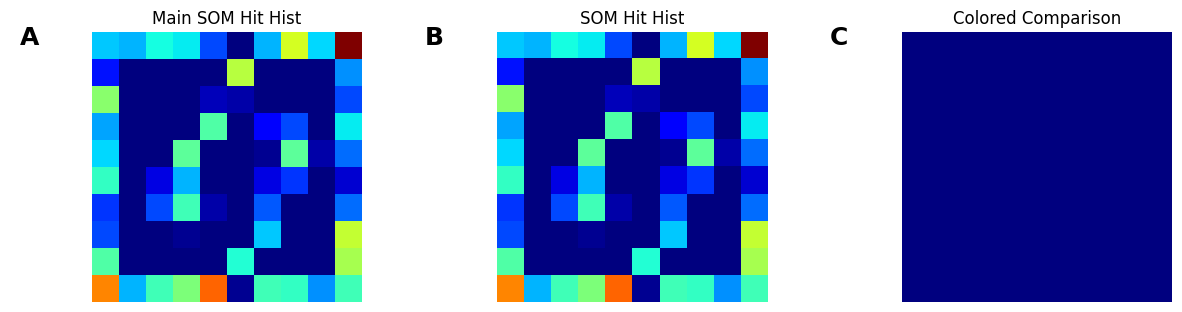

In [95]:
show_comparison_histo(
    main="chainlink_1000.wgt.gz", 
    compare=["chainlink_1000.wgt.gz"],
)

**Small SOM Clustering Dataset**

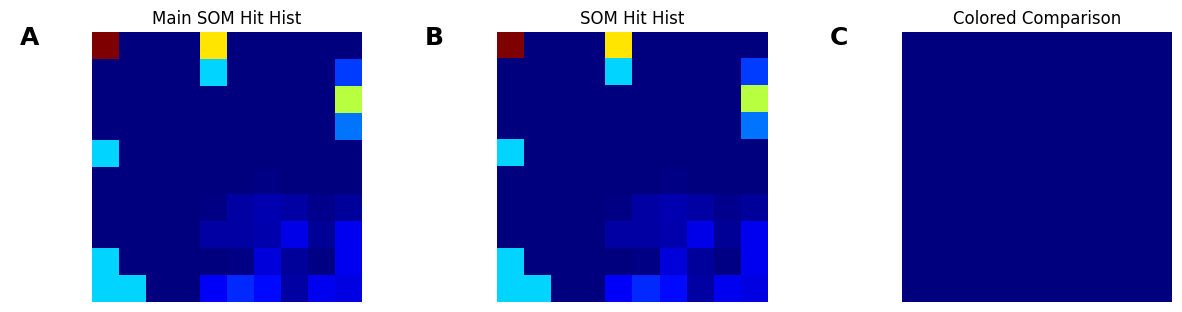

In [96]:
show_comparison_histo(
    base_folder=cluster_base_folder,
    _idata=cluster_idata,
    main="10clusters_1000.wgt.gz", 
    compare=["10clusters_1000.wgt.gz"],
)

### Comparing a SOM with different random seeds

In this experiment, Main and Comparison SOMs are trained with exactly the same parameters. The SOMs only differ by the random seed that was used during training. The Main SOM has seed 7, the others have seeds 1-6. The purpose of this experiment is to investigate the non-deterministic nature of SOM-training. The smaller SOMs show greater differences than the larger ones. Possible reasons for this might be, that the smaller SOMs might not be able to represent the data well, and therefore are far less stable than the larger ones. Another reason might be, that the influence of neighbpring nodes during training is larger if the SOMs that are smaller. Generally it seems that the smaller size SOM tend to be more sensitive to changes.

**Small SOM Chainlink Dataset**

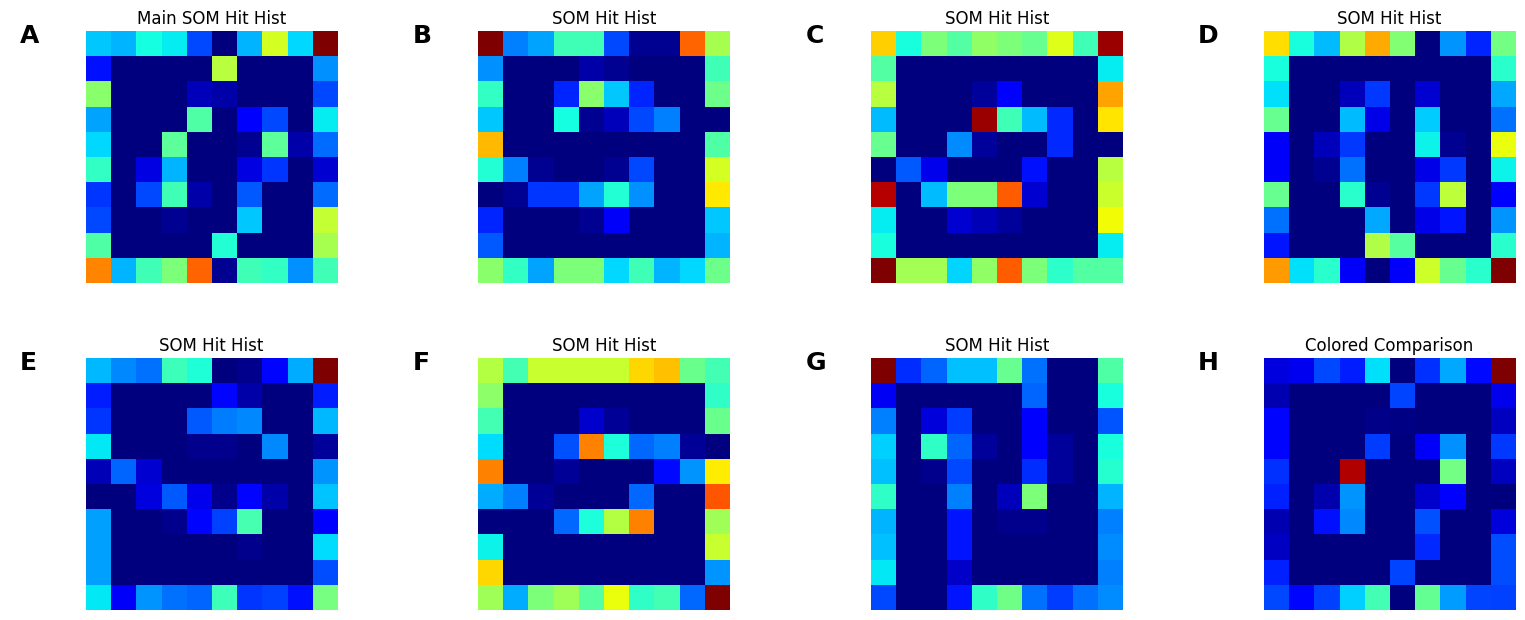

In [97]:
show_comparison_histo(
    main="chainlink_1000.wgt.gz", 
    compare=["chainlink_1000_1.wgt.gz", 
             "chainlink_1000_2.wgt.gz", 
             "chainlink_1000_3.wgt.gz", 
             "chainlink_1000_4.wgt.gz", 
             "chainlink_1000_5.wgt.gz", 
             "chainlink_1000_6.wgt.gz"]
)

**Small SOM 10-clusters Dataset**

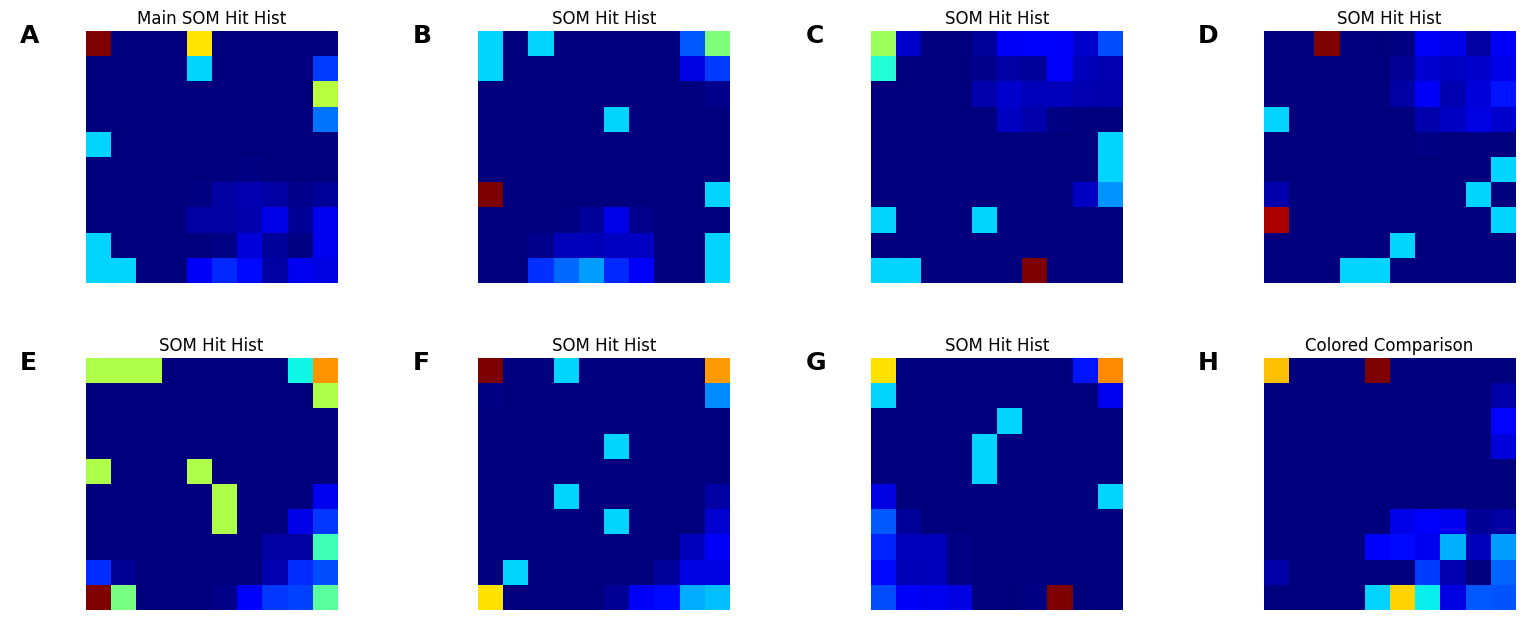

In [98]:
show_comparison_histo(
    base_folder=cluster_base_folder,
    _idata=cluster_idata,
    main="10clusters_1000.wgt.gz", 
    compare=["10clusters_1000_1.wgt.gz", 
             "10clusters_1000_2.wgt.gz", 
             "10clusters_1000_3.wgt.gz", 
             "10clusters_1000_4.wgt.gz", 
             "10clusters_1000_5.wgt.gz", 
             "10clusters_1000_6.wgt.gz"]
)

**Large SOM Chainlink Dataset**

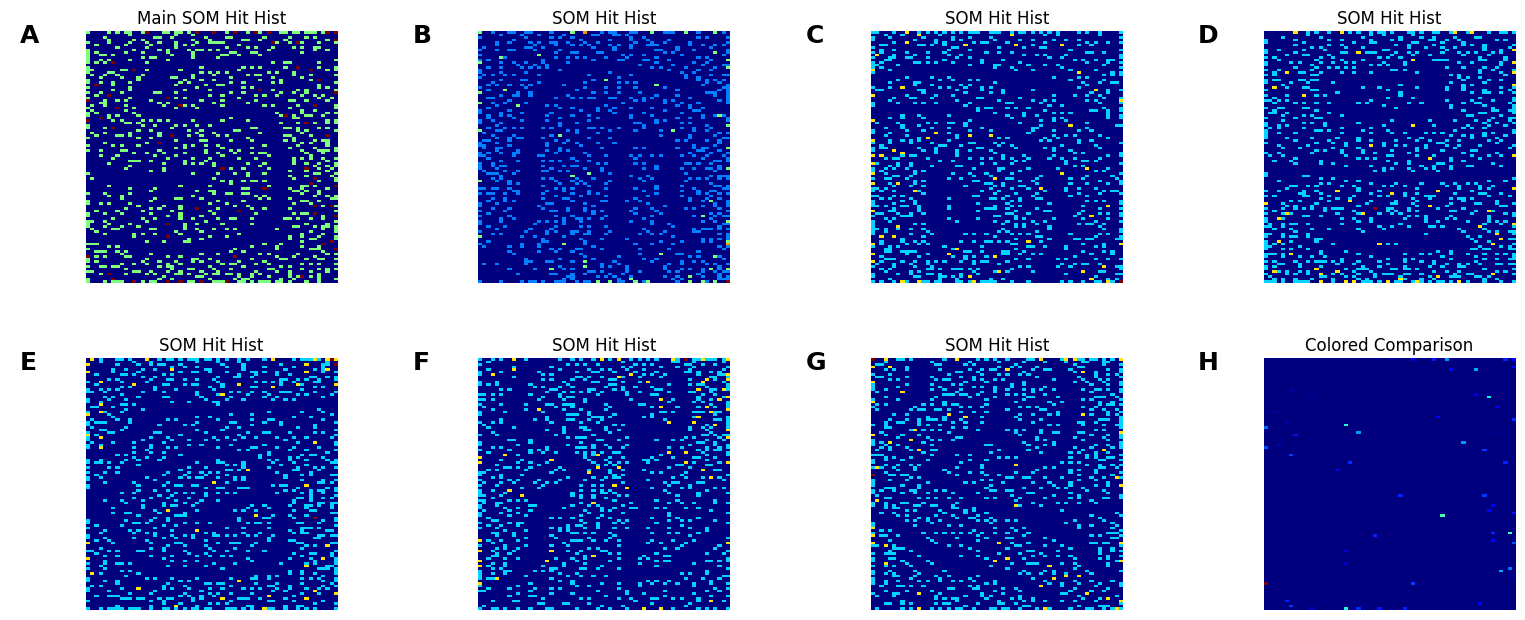

In [99]:

show_comparison_histo(
    main="chainlink_L_100000.wgt.gz", 
    compare=["chainlink_L_100000_1.wgt.gz", 
             "chainlink_L_100000_2.wgt.gz", 
             "chainlink_L_100000_3.wgt.gz", 
             "chainlink_L_100000_4.wgt.gz", 
             "chainlink_L_100000_5.wgt.gz", 
             "chainlink_L_100000_6.wgt.gz"]
)

**Large SOM Clustering Dataset**

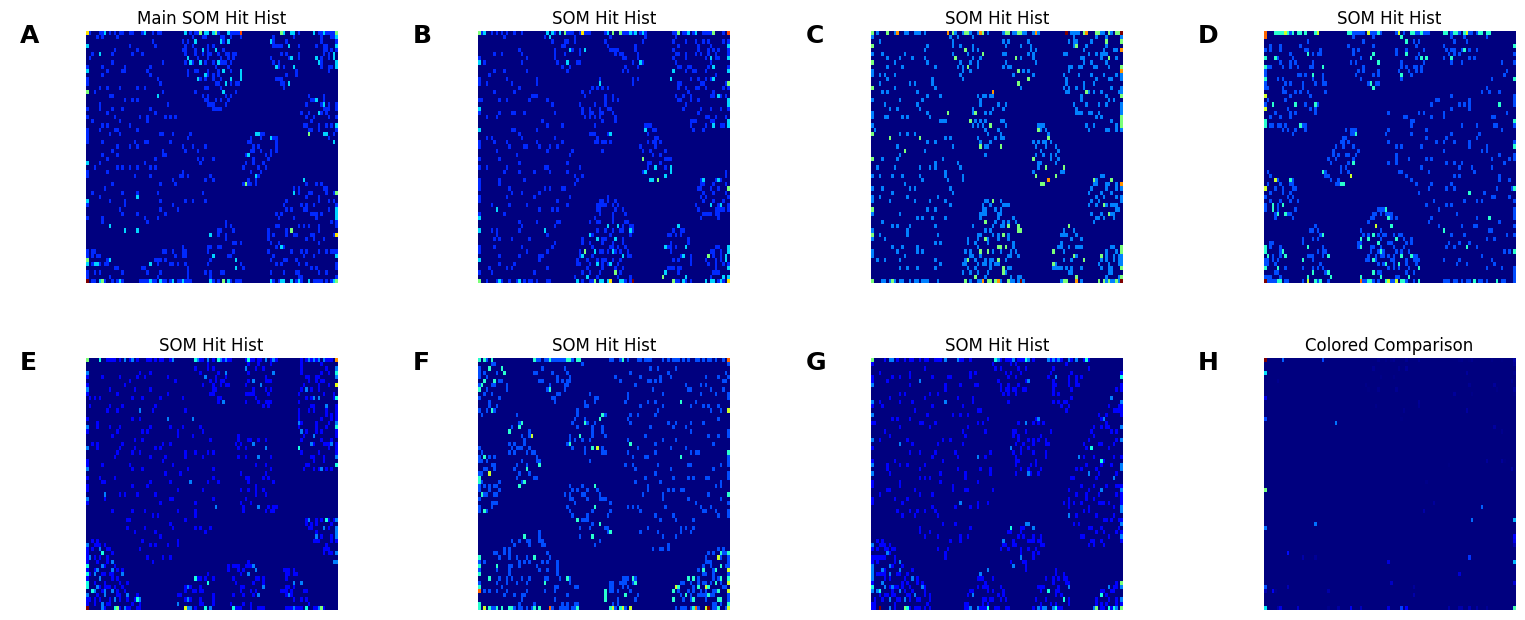

In [100]:
show_comparison_histo(
    base_folder=cluster_base_folder,
    _idata=cluster_idata,
    main="10clusters_L_100000.wgt.gz", 
    compare=["10clusters_L_100000_1.wgt.gz", 
             "10clusters_L_100000_2.wgt.gz", 
             "10clusters_L_100000_3.wgt.gz", 
             "10clusters_L_100000_4.wgt.gz", 
             "10clusters_L_100000_5.wgt.gz", 
             "10clusters_L_100000_6.wgt.gz"]
)

### Comparing SOMs from neighbouring training iterations

The main small SOM is trained in 1000 iterations and compared to the SOMs after 1001, 1005 and 1100 iterations.
The main large SOM is trained in 100,000 iterations and compared to the SOMs after 100,100 and 110,000 iterations.
All SOMs are trained with the same seed (7) to ensure deterministic training. 
The comparison shows that there is only small differences between the SOMs because the SOM does not change much in a low number of iterations, and the SOM also does not change much when training is close to conversion. This indicates that the large changes are happening early during the training, but at that stage the SOMs are not properly trained, so comparing them during that phase might not be very meaningful.

We also provide the comparison result of the Java SOMToolbox. There are some minor differences between our implementation and the SOMToolbox in the case of the small SOM, but overall the results are similar.

**Small SOM Chainlink Dataset**

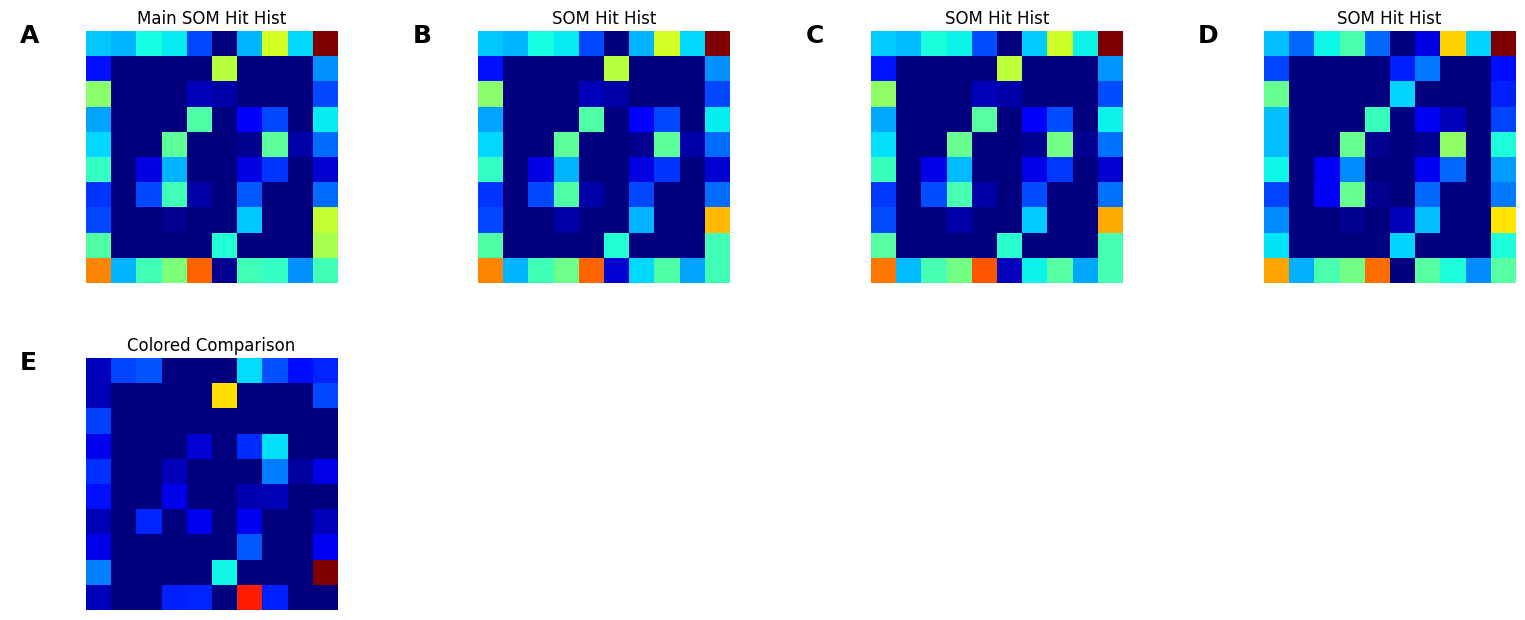

In [101]:
show_comparison_histo(
    main="chainlink_1000.wgt.gz", 
    compare=["chainlink_1001.wgt.gz",
            "chainlink_1005.wgt.gz",
            "chainlink_1100.wgt.gz"]
)

**Small SOM Chainlink Dataset - SOMToolbox comparison**

Java SOMToolbox Comparison

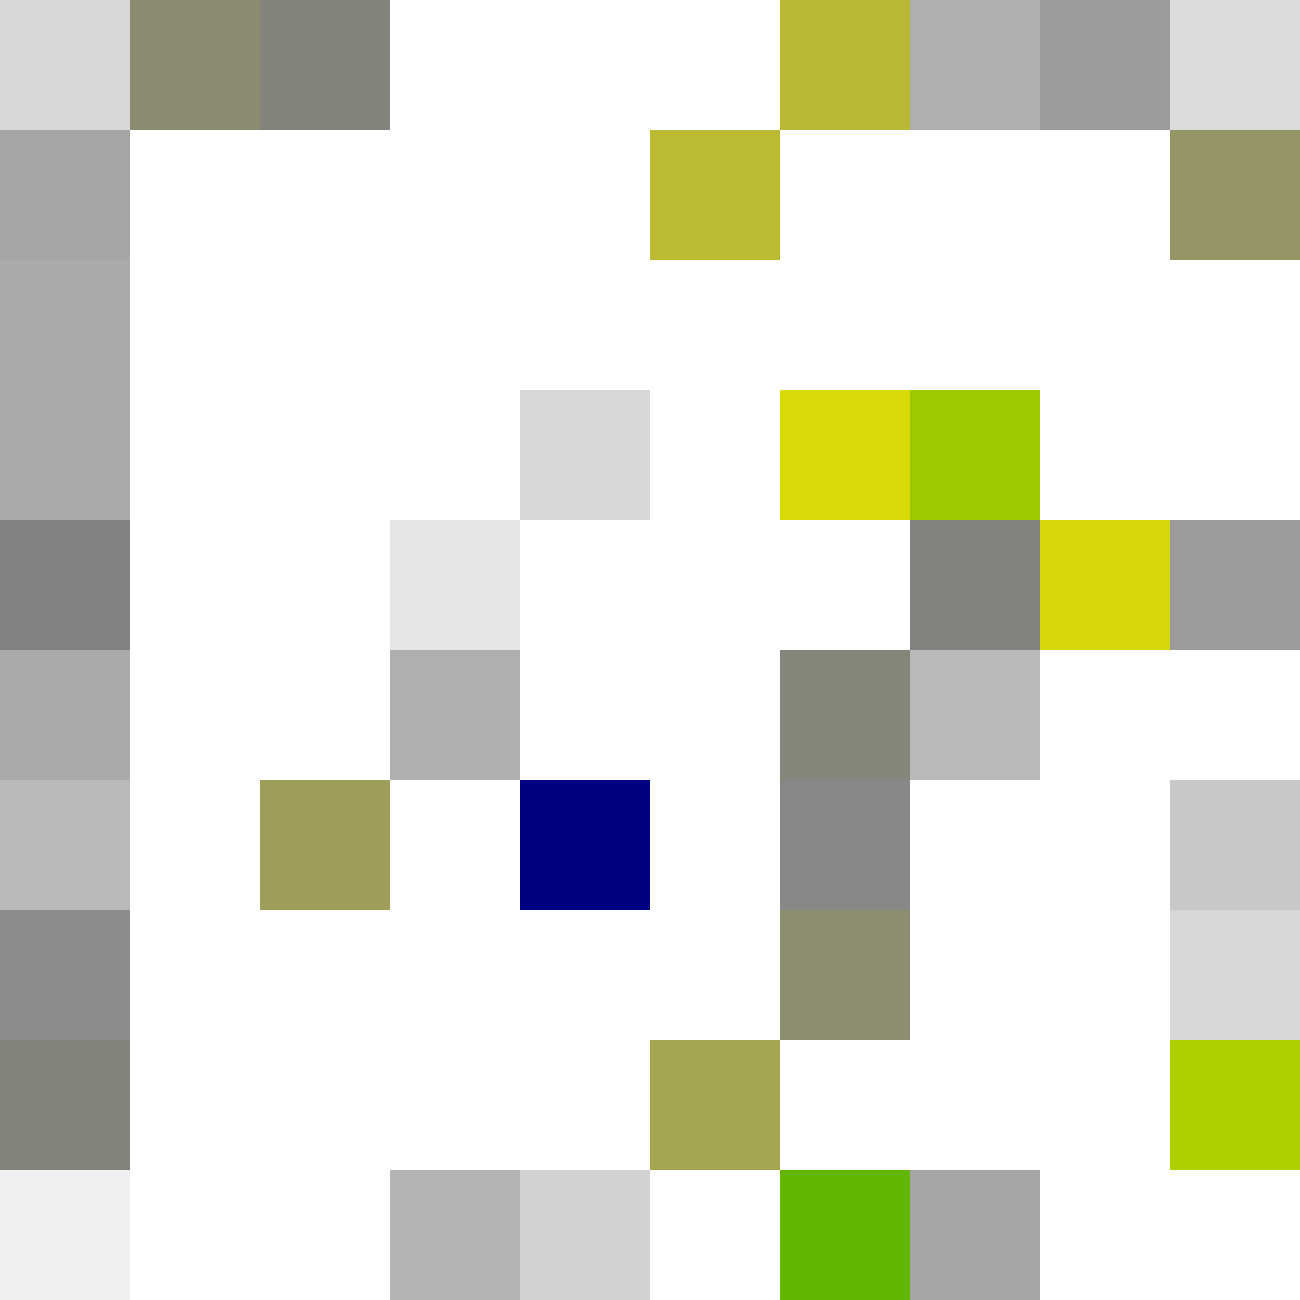

In [102]:
image_path = os.path.join(chainlink_base_folder, 'compare', 'compare_1000_to_1001_1005_1100.png')
display(Markdown(f"Java SOMToolbox Comparison"))
display(Image(filename=image_path, width=300, height=300))

**Small SOM Clustering Dataset**

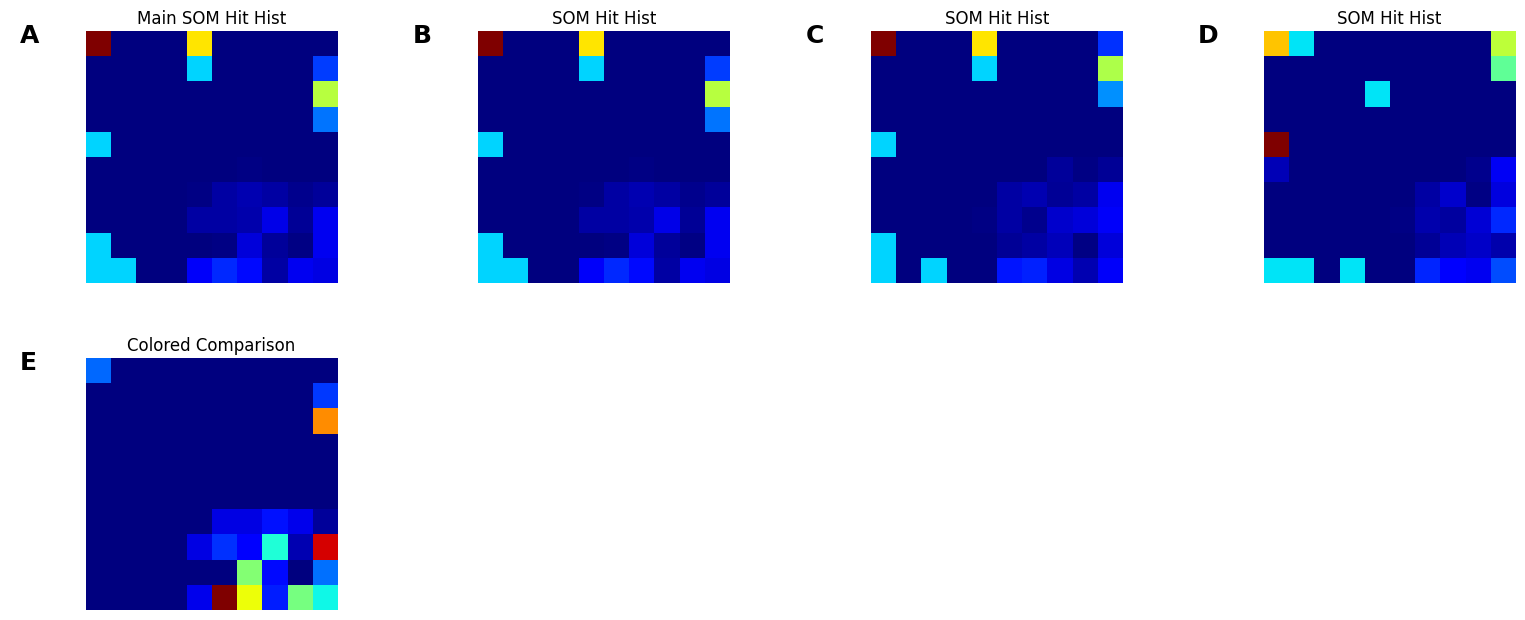

In [103]:
show_comparison_histo(
    base_folder=cluster_base_folder,
    _idata=cluster_idata,
    main="10clusters_1000.wgt.gz", 
    compare=["10clusters_1001.wgt.gz",
            "10clusters_1005.wgt.gz",
            "10clusters_1100.wgt.gz"]
)

**Small SOM Clustering Dataset - SOMToolbox comparison**

Java SOMToolbox Comparison

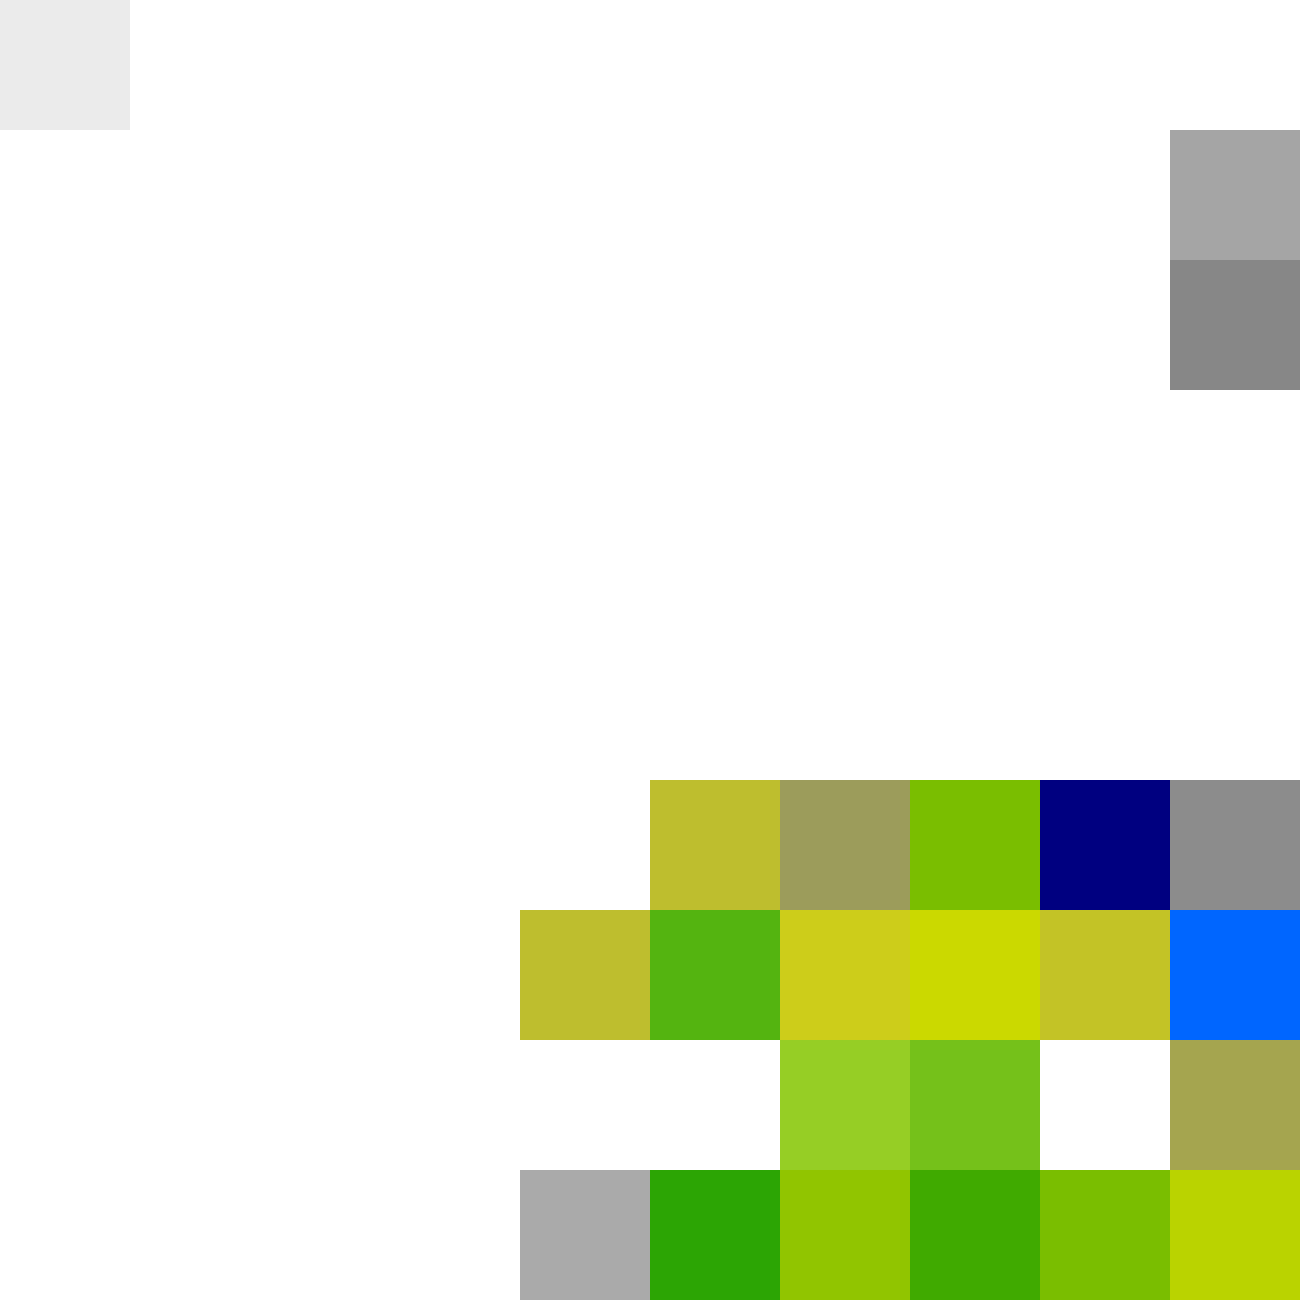

In [104]:
image_path = os.path.join(cluster_base_folder, 'compare', 'compare_1000_to_1001_1005_1100.png')
display(Markdown(f"Java SOMToolbox Comparison"))
display(Image(filename=image_path, width=300, height=300))

**Large SOM Chainlink Dataset**

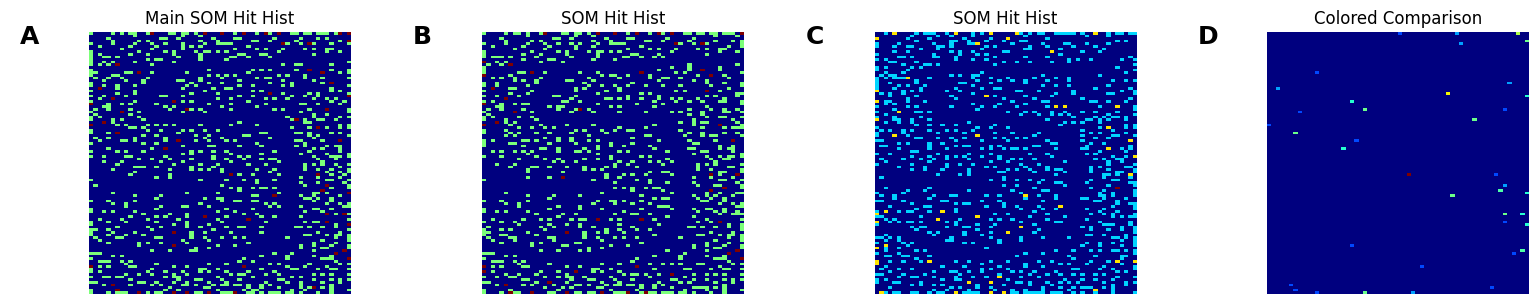

In [105]:
show_comparison_histo(
    main="chainlink_L_100000.wgt.gz", 
    compare=["chainlink_L_100100.wgt.gz",
            "chainlink_L_110000.wgt.gz"]
)

**Large SOM Chainlink Dataset - SOMToolbox comparison**

In [106]:
image_path = os.path.join(chainlink_base_folder, 'compare', 'compare_100000_to_1100000_100100.png')
display(Markdown(f"Java SOMToolbox Comparison"))
display(Image(filename=image_path, width=300, height=300))

Java SOMToolbox Comparison

**Large SOM 10-clusters Dataset**

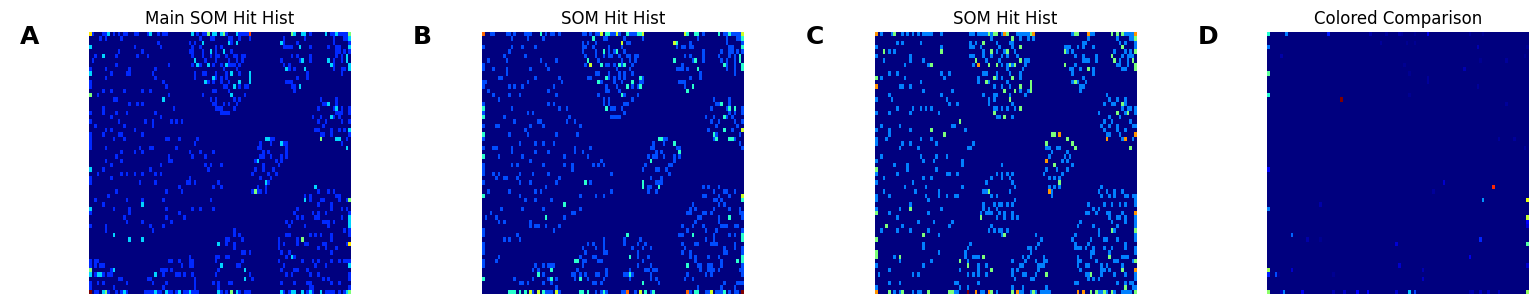

In [107]:
show_comparison_histo(
    base_folder=cluster_base_folder,
    _idata=cluster_idata,
    main="10clusters_L_100000.wgt.gz", 
    compare=["10clusters_L_100100.wgt.gz",
            "10clusters_L_110000.wgt.gz"]
)

**Large SOM 10-clusters Dataset - SOMToolbox comparison**

In [108]:
image_path = os.path.join(cluster_base_folder, 'compare', 'compare_100000_to_100100_110000.png')
display(Markdown(f"Java SOMToolbox Comparison"))
display(Image(filename=image_path, width=300, height=300))

Java SOMToolbox Comparison

### Comparing SOMs from far apart training iterations

The main small SOM is trained in 1000 iterations and compared to the SOMs after 3000 and 10000 iterations.
The main large SOM is trained in 100,000 iterations and compared to the SOMs after 1000 and 10,000 iterations.
All SOMs are trained with the same seed (7) to ensure deterministic training. 
Unsurprisingly, the comparison shows there is large differences between SOMs of far apart training iterations. Still this result shows that our assumptions made for the previous comparisons might be a bit incorrect. There is still a significant amount of change happening even after a few 1000 iterations, which is especially visible on the smaller SOM. As we assumed earlier, larger SOMs tend to be a lot more stable, therefore the comparison result still looks a bit empty, despite the large iteration difference.

**Small SOM Chainlink Dataset**

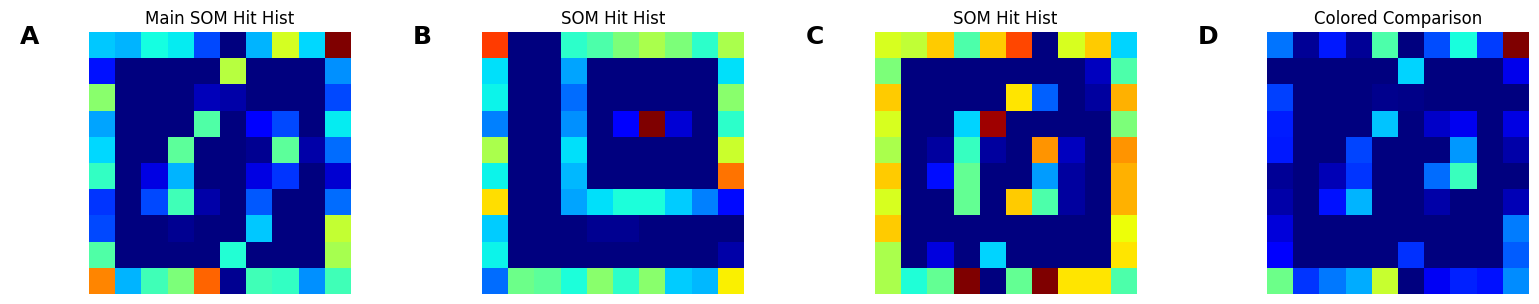

In [109]:
show_comparison_histo(
    main="chainlink_1000.wgt.gz", 
    compare=["chainlink_3000.wgt.gz",
            "chainlink_10000.wgt.gz"]
)

**Small SOM 10-clusters Dataset**

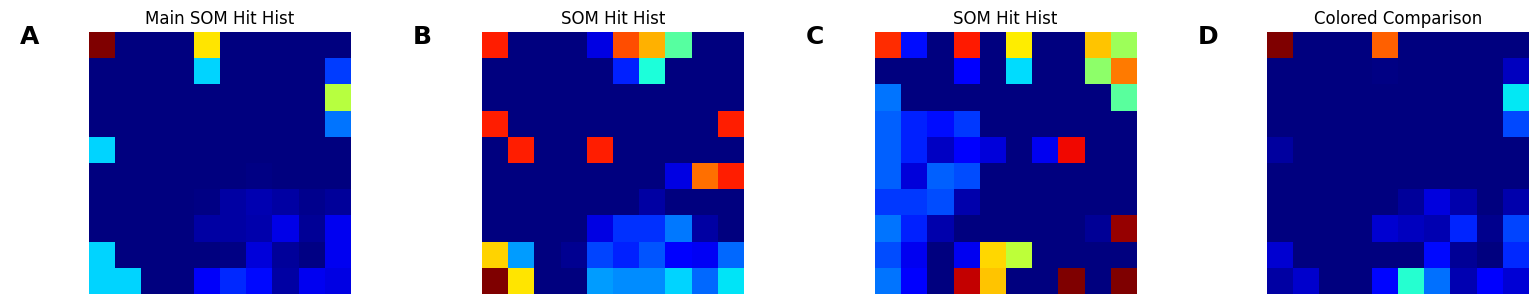

In [110]:
show_comparison_histo(
    base_folder=cluster_base_folder,
    _idata=cluster_idata,
    main="10clusters_1000.wgt.gz", 
    compare=["10clusters_3000.wgt.gz",
            "10clusters_10000.wgt.gz"]
)

**Large SOM Chainlink Dataset**

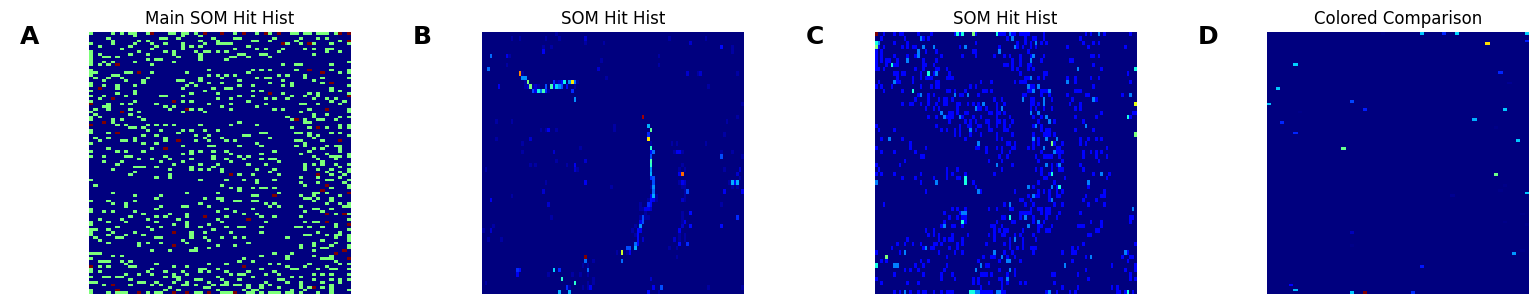

In [111]:
show_comparison_histo(
    main="chainlink_L_100000.wgt.gz", 
    compare=["chainlink_L_1000.wgt.gz",
            "chainlink_L_10000.wgt.gz"]
)

**Large SOM 10-clusters Dataset**

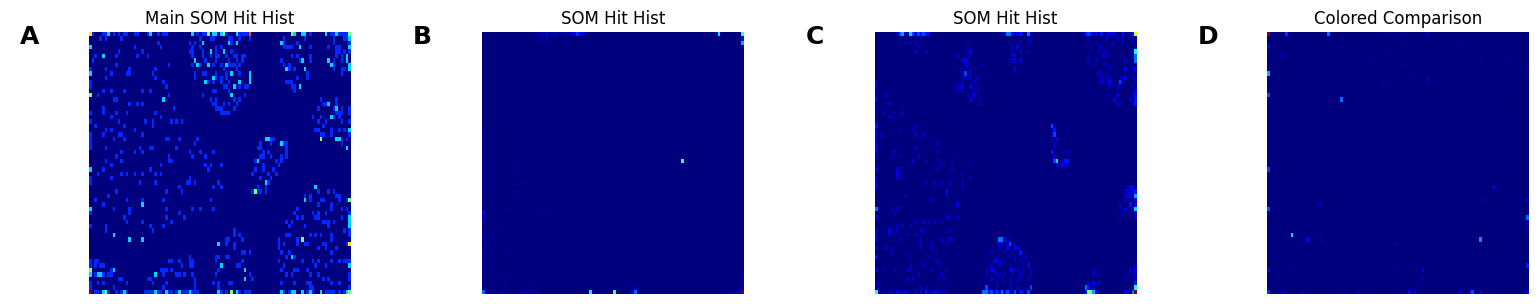

In [112]:
show_comparison_histo(
    base_folder=cluster_base_folder,
    _idata=cluster_idata,
    main="10clusters_L_100000.wgt.gz", 
    compare=["10clusters_L_1000.wgt.gz",
            "10clusters_L_10000.wgt.gz"]
)